In [1]:
from PIL import Image # Pillow
from sklearn.model_selection import train_test_split
from random import shuffle

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Resize images

In [2]:
def resize_images(source_folder_path,
                  size=(300, 300),
                  convert_to='RGB',
                  verbose=1):
    '''Resizes all images stored in provided source_folder_path using BILINEAR function'''
    print('-'*30)
    
    # Check convert type value
    allowed_convert_types = ['1', 'L', 'RGB', 'CMYK']
    if convert_to not in allowed_convert_types:
        print(f'[NOTE]: convert_to value has to be one of {allowed_convert_types} not {convert_to} | FAIL.')
        return False
    
    # Current directory
    curdir = os.path.abspath(os.curdir)
    #
    RESIZED_IMAGES = 'RESIZED_IMAGES'
    # Path for resized images folders
    resized_images_path = os.path.join(curdir, RESIZED_IMAGES)
    # Original images folder name
    old_folder_name = os.path.split(source_folder_path)[-1]
    if verbose == 1:
        print(f'Processing: {old_folder_name} \n')
    # New folder parameters
    new_folder_name = old_folder_name + '_RESIZED'
    new_folder_path = os.path.join(resized_images_path, new_folder_name)
    
    # Make sure root folder to store target directory exists
    if RESIZED_IMAGES not in os.listdir(curdir):
        os.mkdir(path=resized_images_path)
        if verbose == 1:
            print(f'[NOTE]: Created new folder {RESIZED_IMAGES} in current directory | SUCCESS.')
    if verbose == 1:
        print(f'[NOTE]: {RESIZED_IMAGES} (root save directory) exists in curent directory | SUCCESS.')
    
    # Make sure target directory exists
    if new_folder_name not in os.listdir(resized_images_path):
        os.mkdir(path=new_folder_path)
        if verbose == 1:
            print(f'[NOTE]: Created {new_folder_name} in folder {RESIZED_IMAGES} | SUCCESS.')
    if verbose == 1:
        print(f'[NOTE]: {new_folder_name} (target save directory) exists in {RESIZED_IMAGES} directory | SUCCESS.\n')
    
    
    images = os.listdir(source_folder_path)
    try:
        assert len(images) > 0
    except:
        print(f'[ERROR]: Files not found | FAIL.\n')
        return False
    
    correct = 0
    for image in images:
        old_image_path = os.path.join(source_folder_path, image)
        new_image_path = os.path.join(new_folder_path, image)
        if verbose == 1:
            print(f'[NOTE]: {image} resizing | ', end='')
        
        try:
            im = Image.open(fp=old_image_path)
            im = im.resize(size=size, resample=Image.BILINEAR, box=None)
            # Convert image type
            im = im.convert(convert_to)
            im.save(fp=new_image_path)
            correct += 1
            if verbose == 1:
                print('SUCCESS')
        except:
            if verbose == 1:
                print('FAIL')
                print(f'[ERROR]: Problem occured while processing {image} file.\n')
    
    print(f'\n[NOTE]: {correct}/{len(images)} images from {old_folder_name} has been resized succesfully.')
    print(f'[NOTE]: {correct} resized images has been saved in folder:')
    print(f'[PATH]: {new_folder_path}')
    
    print('\n' + '-'*30 + '\n')
    
    return new_folder_path

In [ ]:
# IMAGE_RES = 300
# Image.open(image_path).resize((IMAGE_RES, IMAGE_RES))#.convert('L')

### Preparing workspace
- Down below I am trying to gather images folders paths with their corresponding folder names which lately I am going to use as data labels<br>

__Assumptions:__
- Folder with all images folders is stored in current directory under __Images__ name<br>(thus ```path=./Images```).
- There is more than one folder with image
- Name of the folder that stores the images describes their content<br>(e.g. orange_fruit, ```path=./Images/orange_fruit```)

In [3]:
images_folder_name = 'Images'

# Current directory
curdir = os.path.abspath(os.curdir)

# Path to folder with all images folders
image_folder_path = os.path.join(curdir, images_folder_name)

# List of images folders 
folders = os.listdir(image_folder_path)

folders_dict = {}
for folder in folders:
    # Do not print out hidden folders
    if '.' != folder[0]:
        path = os.path.join(image_folder_path, folder)
        print(path)
        folders_dict[folder] = path

print()
print(f'[NOTE]: Saved {len(folders_dict.keys())} paths (ignored {len(folders) - len(folders_dict.keys())} files).')

/Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/Images/apple_fruit
/Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/Images/banana
/Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/Images/orange_fruit

[NOTE]: Saved 3 paths (ignored 1 files).


### Resizing
- Now, passing to the ```resize_images()``` function prevously gathered images folders paths (that are stored in dictionary ```folders_dict``` where __key is the folder name__ (_label_) and __value is a path__) I am resizing all the images.

In [4]:
resized_folders_dict = {}
for key in folders_dict:
    source_folder_path = folders_dict[key]
    
    resized_path = resize_images(source_folder_path=source_folder_path,
                                 size=(300, 300),
                                 convert_to='RGB',
                                 verbose=0)
    resized_folders_dict[key] = resized_path

    
print(f'[NOTE]: {len(resized_folders_dict.keys())}/{len(folders_dict.keys())} correct processes.')

------------------------------

[NOTE]: 10/10 images from apple_fruit has been resized succesfully.
[NOTE]: 10 resized images has been saved in folder:
[PATH]: /Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/RESIZED_IMAGES/apple_fruit_RESIZED

------------------------------

------------------------------

[NOTE]: 10/10 images from banana has been resized succesfully.
[NOTE]: 10 resized images has been saved in folder:
[PATH]: /Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/RESIZED_IMAGES/banana_RESIZED

------------------------------

------------------------------

[NOTE]: 10/10 images from orange_fruit has been resized succesfully.
[NOTE]: 10 resized images has been saved in folder:
[PATH]: /Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/RESIZED_IMAGES/orange_fruit_RESIZED

------------------------------

[NOTE]: 3/3 correct processes.


## So far so good:
- [x] ```folders_dict```: Contains all original images folder paths with corresponding keys.
- [x] ```resized_folders_dict```: __Contains all resized images folder paths with corresponding keys__.
---

### resized_folders_dict

- __Key__: Folder name (images label)
- __#imgs__: number of images
- __size__: (height, width) [pixels]
- __#channels__: depth of the image 
    - RGB -> 3 channels, 
    - GrayScale -> 1 channel
    - ...
- __mode__: mode of Image according to Pillow.Image()
    - 1 (1-bit pixels, black and white, stored with one pixel per byte)
    - L (8-bit pixels, black and white)
    - RGB (3x8-bit pixels, true color)
    - ...

In [5]:
print('\nresized_folders_dict:'.upper())
print('-'*65)
print('| %20s | %3s | %11s | %9s | %4s |' % ('KEY', '#imgs', 'size', '#channels', 'mode'))
print('-'*65)

for key in resized_folders_dict:
    images = os.listdir(resized_folders_dict[key])
    im = Image.open(os.path.join(resized_folders_dict[key], images[0]))
    
    size = im.size
    n_channels = len(im.split())
    mode = im.mode
    
    print('| %20s | %5s | %11s | %9s | %4s |' % (key, len(images), size, n_channels, mode))
    
print('-'*65)


RESIZED_FOLDERS_DICT:
-----------------------------------------------------------------
|                  KEY | #imgs |        size | #channels | mode |
-----------------------------------------------------------------
|          apple_fruit |    10 |  (300, 300) |         3 |  RGB |
|               banana |    10 |  (300, 300) |         3 |  RGB |
|         orange_fruit |    10 |  (300, 300) |         3 |  RGB |
-----------------------------------------------------------------


---

### Continuation of data preprocessing

In [6]:
X_data = []
y_data = []

for key in resized_folders_dict:
    images = os.listdir(resized_folders_dict[key])
    
    for img in images:
        img_path = os.path.join(resized_folders_dict[key], img)
        
        # Load an image
        im = Image.open(img_path)
        
        # Normalize [0, 1]
        
        arr = np.asarray(im)/255.
        
        # Append numpy array
        X_data.append(arr)
        # Append label
        y_data.append(key)

In [7]:
# get NupmPy array data type to obtain more effective transformations
X_data = np.array(X_data)
y_data = np.array(y_data)

# Reshape label array (n x 1)
y_data.resize((len(y_data), 1))

print(f'[NOTE]: len(X_data) == len(y_data): {len(X_data) == len(y_data)}')
print(f'[NOTE]: Number of examples: {len(X_data)}.')
print(f'[NOTE]: X_data shape: {X_data.shape}.')
print(f'[NOTE]: y_data shape: {y_data.shape}.')

[NOTE]: len(X_data) == len(y_data): True
[NOTE]: Number of examples: 30.
[NOTE]: X_data shape: (30, 300, 300, 3).
[NOTE]: y_data shape: (30, 1).


---

### Encode labels

In [8]:
def get_one_hot_encoded_labels(labels):
    df = pd.DataFrame(labels, columns=['Labels'])
    return pd.get_dummies(df['Labels']).to_numpy()

In [9]:
y_data_one_hot = get_one_hot_encoded_labels(labels=y_data)

print(f'[NOTE]: y_data shape: {y_data.shape}.')
print(f'[NOTE]: y_data_encoded shape: {y_data_one_hot.shape}.')

[NOTE]: y_data shape: (30, 1).
[NOTE]: y_data_encoded shape: (30, 3).


---

### Train / Test / Evaluate split
- X_train, y_train, 
- X_test, y_test, 
- X_evaluate, y_evaluate.

In [10]:
# Train, test split (uses whole dataset)
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data_one_hot,
                                                    test_size=0.2,
                                                    random_state=13)

# Train, evaluate split (splits only training subset)
X_train, X_evaluate, y_train, y_evaluate = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.1,
                                                            random_state=13)

In [11]:
print('-'*44)
print('| %11s | %19s | %4s |' % ('var_name', 'shape', 'size'))

for idx, i in enumerate([X_train, y_train, X_test, y_test, X_evaluate, y_evaluate]):
    name = ['X_train', 'y_train', 'X_test', 'y_test', 'X_evaluate', 'y_evaluate'][idx]
    if name[0] == 'X':
        print('-'*44)
    
    print('| %11s | %19s | %4s |' % (name, str(i.shape), str(round(len(i)/len(X_data)*100))+'%'))

print('-'*44)
          

--------------------------------------------
|    var_name |               shape | size |
--------------------------------------------
|     X_train |   (21, 300, 300, 3) |  70% |
|     y_train |             (21, 3) |  70% |
--------------------------------------------
|      X_test |    (6, 300, 300, 3) |  20% |
|      y_test |              (6, 3) |  20% |
--------------------------------------------
|  X_evaluate |    (3, 300, 300, 3) |  10% |
|  y_evaluate |              (3, 3) |  10% |
--------------------------------------------


### Plot some of the train data

[]

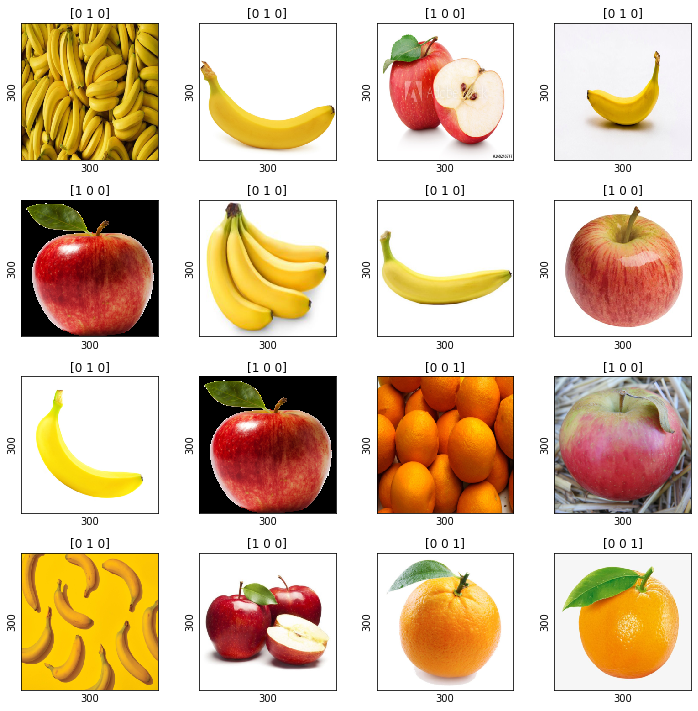

In [12]:
# n has to be 'squartable' (4, 9, 16, 25, 36)
n = 16

a = np.sqrt(n)
# Get list of numbers in range n that are random and unique
x = list(range(len(X_train)))
shuffle(x)
x = x[:n]

plt.figure(figsize=(10,10))

for i in range(n):
    plt.subplot(a, a, i+1)
    plt.tight_layout(pad=1.)
    idx = x.pop()
    plt.imshow(X_train[idx])
    plt.xlabel(X_train[idx].shape[0])
    plt.ylabel(X_train[idx].shape[1])
    plt.title(f'{y_train[idx].squeeze()}')
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    

plt.plot()

# Keras implementation

In [82]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [83]:
#input_shape=(300,300,3)
#labels_unique = 3

def model():
    model = Sequential()
    
    # Convolution 
    model.add(Conv2D(filters=32, 
                     kernel_size=(5, 5),
                     strides=(1, 1),
                     padding='valid',
                     activation='relu',
                     input_shape=(300,300,3)))
    
    # MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2),
                           strides=(2, 2)))
    
    # Flatten - transforms the images from a 2d-array
    model.add(Flatten())
    
    # Output layer - with each node representing a class
    model.add(Dense(3, activation='softmax'))
    
    return model

model = model()

In [84]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 296, 296, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 700928)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 2102787   
Total params: 2,105,219
Trainable params: 2,105,219
Non-trainable params: 0
_________________________________________________________________


In [16]:
# categorical_crossentropy - multiclass categorizer
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, y_train,
                 batch_size=30,
                 epochs=10,
                 validation_data=(X_evaluate, y_evaluate))

#                  validation_split=0.3

Train on 14 samples, validate on 7 samples
Epoch 1/10
14/14 [==============================] - 1s 86ms/step - loss: 1.1240 - accuracy: 0.2857 - val_loss: 79.5780 - val_accuracy: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 1s 64ms/step - loss: 30.2006 - accuracy: 0.3571 - val_loss: 30.3984 - val_accuracy: 0.2857
Epoch 3/10
14/14 [==============================] - 1s 71ms/step - loss: 12.0117 - accuracy: 0.5000 - val_loss: 0.1521 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 1s 73ms/step - loss: 1.2085 - accuracy: 0.7143 - val_loss: 3.7585 - val_accuracy: 0.7143
Epoch 5/10
14/14 [==============================] - 1s 64ms/step - loss: 3.9888 - accuracy: 0.4286 - val_loss: 1.9135 - val_accuracy: 0.7143
Epoch 6/10
14/14 [==============================] - 1s 58ms/step - loss: 0.5292 - accuracy: 0.8571 - val_loss: 5.5507 - val_accuracy: 0.1429
Epoch 7/10
14/14 [==============================] - 1s 78ms/step - loss: 0.8644 - accuracy: 0.7857 - va

---

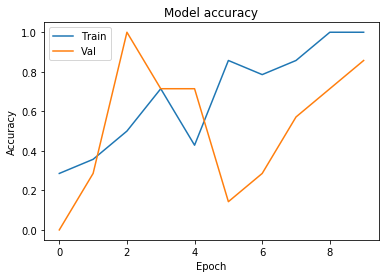

In [27]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

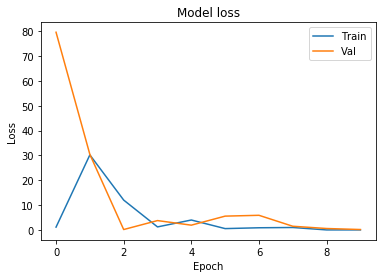

In [28]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

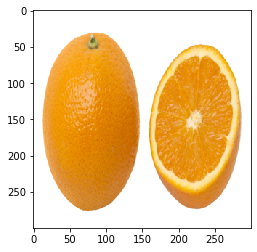

In [36]:
plt.imshow(X_test[0])

In [46]:
model.predict(X_test)[0].argmax() == y_test[0].argmax()

True

In [59]:
print('Evaluate test data:\n')
for name, val in zip(model.metrics_names, model.evaluate(X_test, y_test, verbose=0)):
    print('%10s: %2.4f' % (name, val))

Evaluate test data:

      loss: 1.9833
  accuracy: 0.6667


In [66]:
layer = model.get_layer(index=0)

In [67]:
layer.bias

<tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.00256065, -0.00399285,  0.00464852, -0.00617969, -0.00387205,
       -0.00378296,  0.00513319, -0.00190341,  0.00431614,  0.00038783,
        0.00467791, -0.00049612, -0.00682747, -0.00076072,  0.00083447,
       -0.00276848, -0.00577965, -0.00268803,  0.00533866, -0.00620408,
       -0.00628773,  0.00461872,  0.00177682, -0.00065536, -0.00304393,
       -0.00485373,  0.00154519, -0.00532402,  0.00768381,  0.00378181,
       -0.00222348,  0.00207016], dtype=float32)>

In [69]:
layer.count_params()

2432

---

# Notes

- Gaussian/Avg Blur over the sobel filter<br>
in order to reduce these <not really edges> made by noise.<br>
(note that sobel filter is  meant to be used only on a grayscale imgages)<br>

    1. Graysclae convertion
    2. Gausian/Avg blur filter (easy on this one)
    3. Sobel filter (horizonal and vertical)

# Transfer learning

- [TF2] Feature vectors of images with __MobileNet V2__ trained on ImageNet (ILSVRC-2012-CLS).

In [98]:
# !pip3 install -U tensorflow_hub
# !pip3 install -U scikit-image

In [100]:
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import layers
from skimage.transform import resize

### MobileNet V2 expects 224x224x3 images
- MobileNet is expecting images of 224  ×  224 pixels, in 3 color channels (RGB)

In [132]:
path = '/Users/Patryk.Laskowski@ibm.com/Desktop/GOOGLE_IMAGES/all'

X_data = []
y_data = []

for image in os.listdir(path):
    if image[0] != '.':
        im_path = os.path.join(path, image)
        im = Image.open(im_path).resize((224, 224))
        im = im.convert('RGB')
#         im = plt.imread(im_path, format='jpg')
        
#         resized = resize(image=im, output_shape=(224, 224, 3))

        if 'apple' in image:
            label = [1, 0, 0]
        elif 'orange' in image:
            label = [0, 1, 0]
        elif 'banana' in image:
            label = [0, 0, 1]
        else:
            raise Exception('ERRrrr.')

        X_data.append(resized)
        y_data.append(label)

In [133]:
X_data = np.array(X_data)/255.
y_data = np.array(y_data)/255.

print(X_data.shape)
print(y_data.shape)

(797, 224, 224, 3)
(797, 3)


In [124]:
IMAGE_RES = 224

In [125]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

feature_extractor.trainable = False

In [126]:
model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [127]:
model.compile(
  optimizer='adam', 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [128]:
history = model.fit(x=X_data,
                    y=y_data,
                    epochs=5,
                    validation_split=0.3)
#                     validation_data=validation_batches)

Train on 557 samples, validate on 240 samples
Epoch 1/5
 32/557 [>.............................] - ETA: 37s

ValueError: Can not squeeze dim[1], expected a dimension of 1, got 3 for 'metrics/accuracy/Squeeze' (op: 'Squeeze') with input shapes: [?,3].

In [ ]:
model.predict(image_batch)

---

In [ ]:
# Save
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

---

In [ ]:
URL = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

hub.KerasLayer(URL